# Engineering Mathematics Computer Assignment
- **Name**: __Mohammad Amin Rashid__
- **Student ID**:  __810102454__
****
If you have any questions, contact the TAs:
- **Babak Hosseini Mohtasham**:
    - *Email*: babak.hosseini.m@ut.ac.ir
    - *Telegram*: @babakstar
- **Sina**
    - *Email*: msina.parvizi@ut.ac.ir
    - *Telegram*: @Mosipamo

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import metrics
import cv2
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Part 1: Discrete Fourier Series in 1D

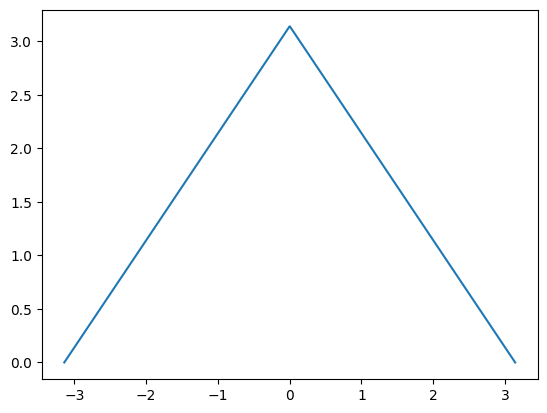

In [5]:
N = 1000
pi=np.pi
x = np.linspace(-pi,pi,N)
x1=x[x<0]
x2=x[x>=0]
x1=x1+pi
x2=-x2+pi
y=np.append(x1,x2)
plt.plot(x,y)

In [6]:
def discrete_fourier_series(f, N, n,x):
    a_n =0
    b_n =0
    for i in range(N):
        a_n += f[i]* math.cos(n*x[i])   
        b_n += f[i]* math.sin(n*x[i])    
        
        
    a_n *= 1/pi;
    b_n *= 1/pi;  
    
    a_n *= (2*pi)/(N-1);
    b_n *= (2*pi)/(N-1);  

    
    
    return a_n, b_n



a0,_=discrete_fourier_series(y, N, 0 , x)
a1 , b1= discrete_fourier_series(y, N, 1 , x)
a2 , b2 =discrete_fourier_series(y, N, 2 , x)
a3 , b3 =discrete_fourier_series(y, N, 3 , x)
print("report of first Coefficients:  ")

print("a0=" + str(a0/2))
print("a1="+ str(a1),"b1="+ str(b1))
print("a2="+ str(a2),"b2="+ str(b2))
print("a3="+ str(a3),"b3="+ str(b3))


report of first Coefficients:  
a0=1.570794752852258
a1=1.2732405940307747 b1=-7.116438792698354e-17
a2=-3.147916407108375e-06 b2=2.642342595682562e-16
a3=0.14147210982589067 b3=7.401991489503251e-17


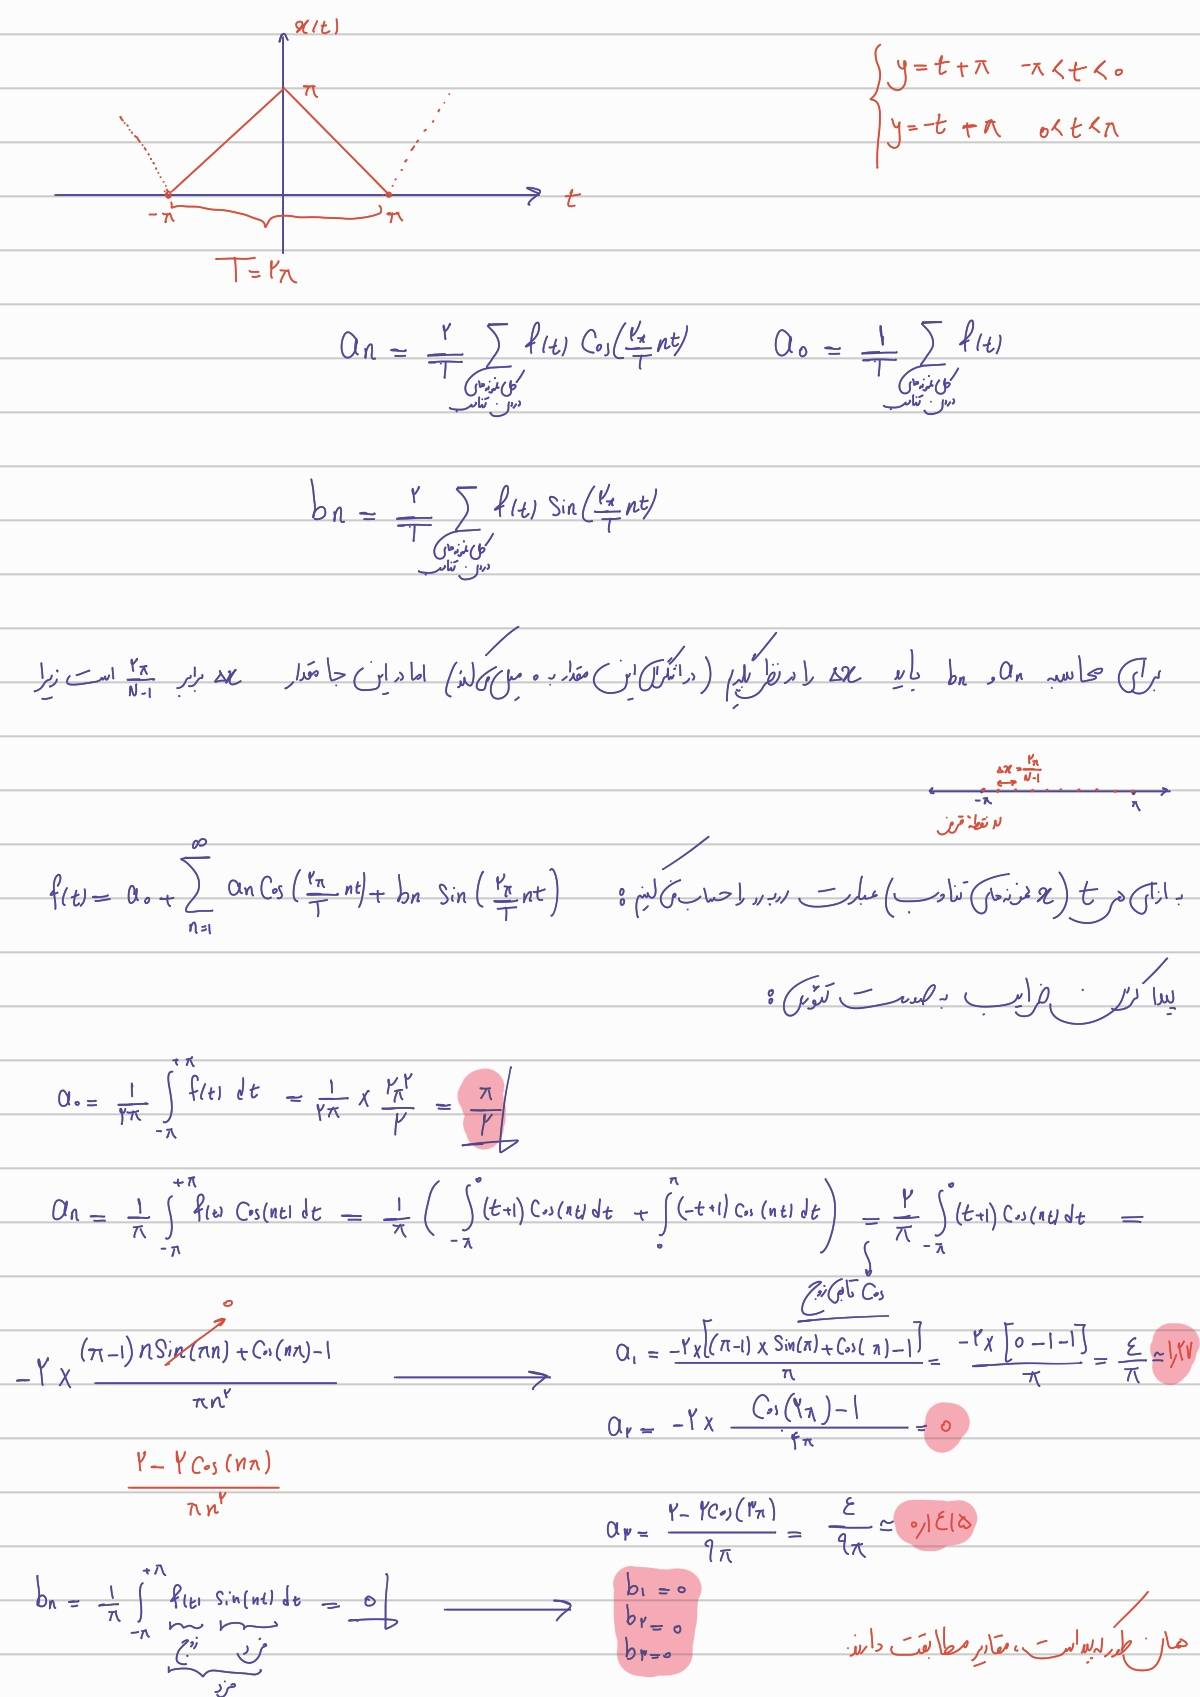

In [91]:
def reconstruct_function(num_terms):
    x_recon = np.linspace(-pi,pi,N)
    y_recon = []
    
    a_0, _ = discrete_fourier_series(y, N, 0 , x)

    for t in x_recon:
        f_t = a_0 / 2
        for n in range(1, num_terms + 1):
            a_n, b_n = discrete_fourier_series(y, N, n, x)
            f_t += a_n* math.cos(n*t) + b_n * math.sin(n*t)
        y_recon.append(f_t)

    return y_recon

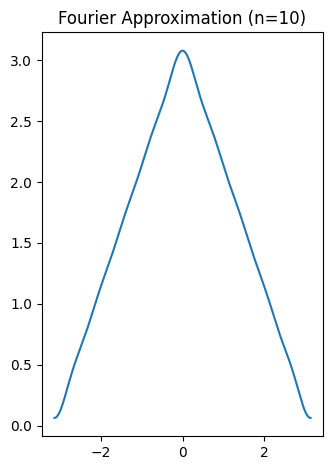

In [8]:
num_terms=10
y_recon = reconstruct_function(num_terms)

plt.subplot(1, 2, 2)
x_plot = np.linspace(-pi,pi,N)
plt.plot(x_plot, y_recon)
plt.title(f"Fourier Approximation (n={num_terms})")
plt.tight_layout()
plt.show()

Loss (n=2):
mse  is0.011974515229227958       mae is 0.09222143674767645
Loss (n=5):
mse  is0.0006041947390953342       mae is 0.018660941228077974
Loss (n=50):
mse  is1.2513695543659181e-06       mae is 0.0005042666384099158


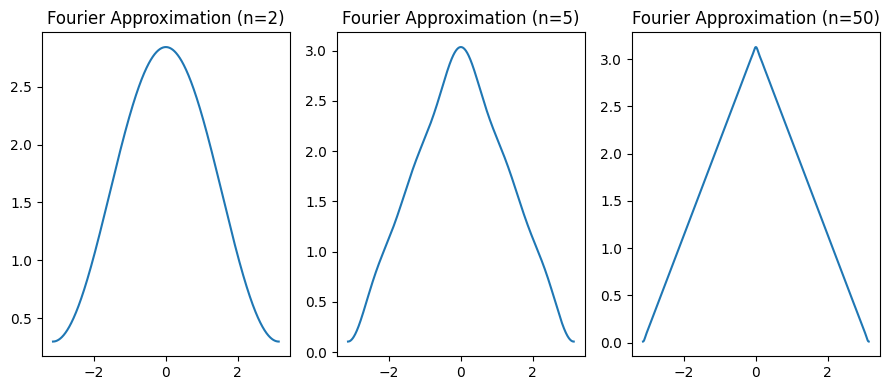

In [6]:
num_terms = [2, 5, 50]
plt.figure(figsize=(3*len(num_terms), 4))

for i, num in enumerate(num_terms):
    plt.subplot(1, len(num_terms), i+1)
    y_recon = reconstruct_function(num)
    x_plot = np.linspace(-pi,pi,N)
    plt.plot(x_plot, y_recon)
    plt.title(f"Fourier Approximation (n={num})")
    plt.tight_layout()

    print(f"Loss (n={num}):")
    mse = mean_squared_error(y, y_recon)
    mae = mean_absolute_error(y, y_recon)
    print("mse  is"+ str(mse)+"       " + "mae is "+ str(mae) )

plt.show()

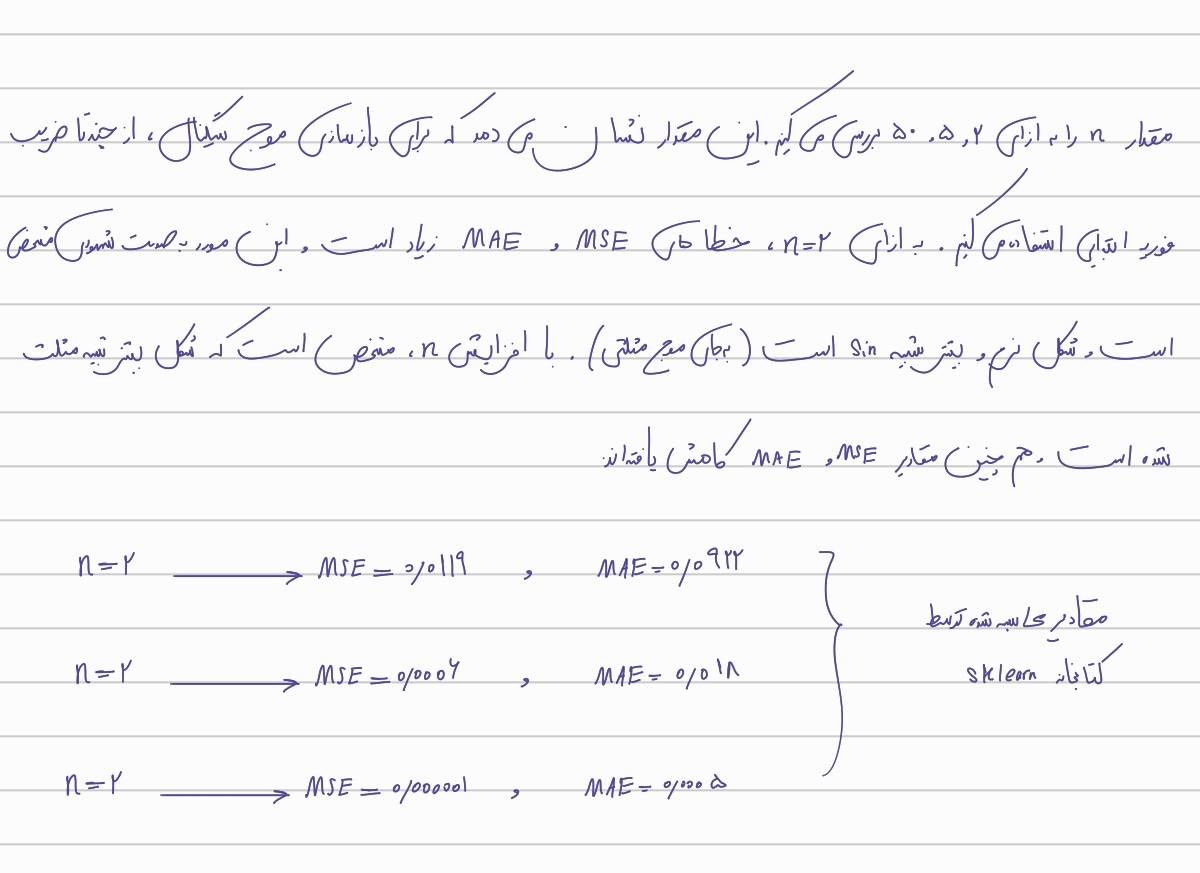

# Part 2: Discrete Fourier Series in 2D

## Grayscale image

In [12]:
def load_grayscale_image(path, width, height):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE) / 255.0
    image = cv2.resize(image, dsize=(width, height), interpolation=cv2.INTER_CUBIC)
    return image

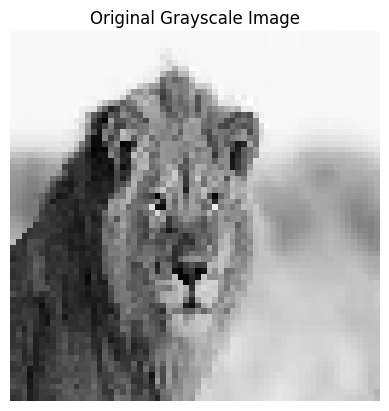

In [13]:
image = load_grayscale_image("./lion2.jpeg", 64, 64)

min_pixel=np.min(image)
max_pixel=np.max(image)
for i in range(64):
    for j in range(64):
        image[i,j]= (image[i,j] - min_pixel)/(max_pixel-min_pixel)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.show()


In [14]:
import numpy as np

def dft2d(image):

    M, N = image.shape
    F = np.zeros((M, N), dtype=complex)
    pi=np.pi
    for k in range(M):
        for l in range(N):
            x = 0
            for m in range(M):
                for n in range(N):
                    x += image[m, n] * np.exp(-2j * pi * ((k*m/M )+ (l*n/N)))
            F[k, l] = x
    
    return F

def idft2d(F):

    M, N = F.shape
    f = np.zeros((M, N), dtype=complex)
    pi=np.pi
    for k in range(M):
        for l in range(N):
            x = 0
            for m in range(M):
                for n in range(N):
                    x += F[m, n] * np.exp(2j * pi * ((k*m/M )+ (l*n/N)))
            f[k, l] = x/(M*N)
    
    return f

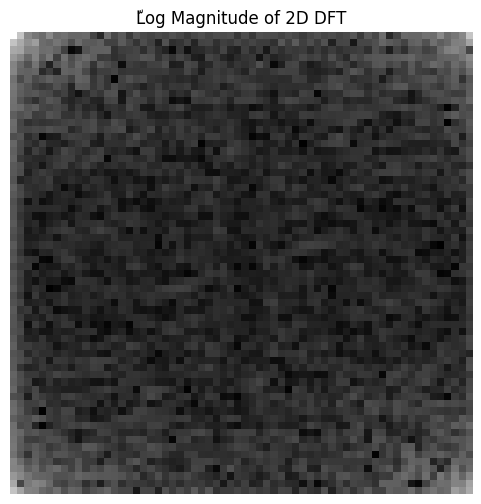

In [15]:
F = dft2d(image)
# A=idft2d(F)
plt.figure(figsize=(15, 6))
log_magnitude_dft = np.log(1 + np.abs(F))

plt.imshow( log_magnitude_dft, cmap='gray')
plt.title('ّLog Magnitude of 2D DFT')
plt.axis('off')
plt.show()

In [88]:
def compress_image(F, fraction):
    rows, cols = F.shape
    compressed_F = np.zeros_like(F, dtype=complex)
    
    x = int(rows * np.sqrt(fraction))
    y = int(cols * np.sqrt(fraction))

    for i in range(x):
        for j in range (y):
            compressed_F[i][j]=F[i][j]
    
    return compressed_F



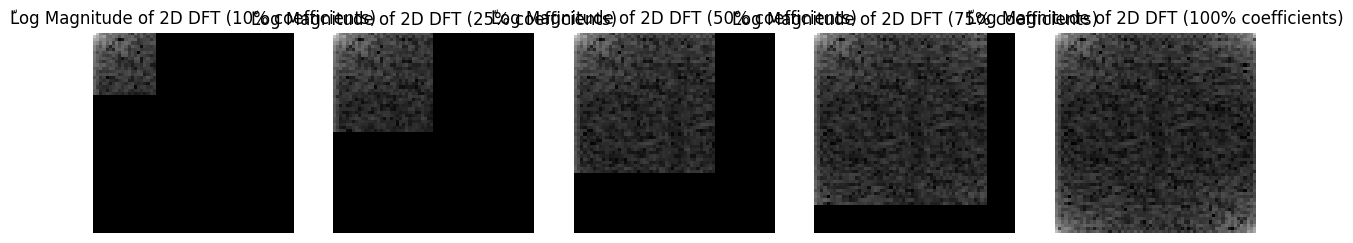

In [90]:
fractions = [0.1, 0.25, 0.5, 0.75,1 ]
plt.figure(figsize=(15, 6))

for i, frac in enumerate(fractions):
    plt.subplot(1, len(fractions), i + 1)
    compressed_F = compress_image(F, frac)
    log_magnitude_dft = np.log(1+np.abs(compressed_F))
  
    plt.imshow(log_magnitude_dft, cmap='gray')
    plt.title(f'ّLog Magnitude of 2D DFT ({frac *100:.0f}% coefficients)')
    plt.axis('off')
    
plt.show()

Loss (25% coefficients):
Loss (50% coefficients):
Loss (75% coefficients):
Loss (100% coefficients):


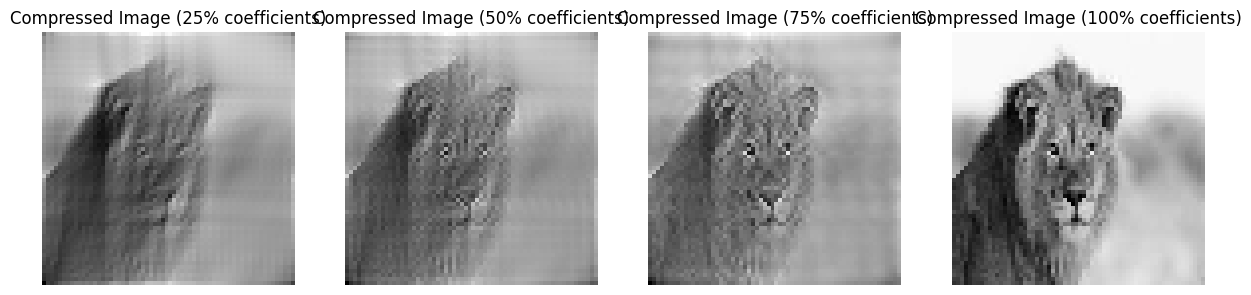

In [50]:
fractions = [0.25, 0.5, 0.75, 1]
plt.figure(figsize=(15, 6))

for i, frac in enumerate(fractions):
    compressed_F = compress_image(F, frac)
    reconstructed_image = np.abs(idft2d(compressed_F))

    plt.subplot(1, len(fractions), i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Compressed Image ({frac *100:.0f}% coefficients)')
    plt.axis('off')
    
    print(f"Loss ({frac *100:.0f}% coefficients):")
    
    
plt.show()

In [16]:
for i, frac in enumerate(fractions):
    compressed_F = compress_image(F, frac)
    reconstructed_image = np.abs(idft2d(compressed_F))

    mse = mean_squared_error(image, reconstructed_image)
    mae = mean_absolute_error(image, reconstructed_image)
    
    print(f"Loss (mse)({frac *100:.0f}% coefficients):" + str(mse))
    print(f"Loss (mae)({frac *100:.0f}% coefficients):" + str(mae))

Loss (mse)(25% coefficients):0.030136522498343955
Loss (mae)(25% coefficients):0.14641095025559317
Loss (mse)(50% coefficients):0.028926924979682377
Loss (mae)(50% coefficients):0.14384477994229466
Loss (mse)(75% coefficients):0.027708317693482035
Loss (mae)(75% coefficients):0.14140017332717908
Loss (mse)(100% coefficients):7.768156676082374e-29
Loss (mae)(100% coefficients):6.465583040360569e-15


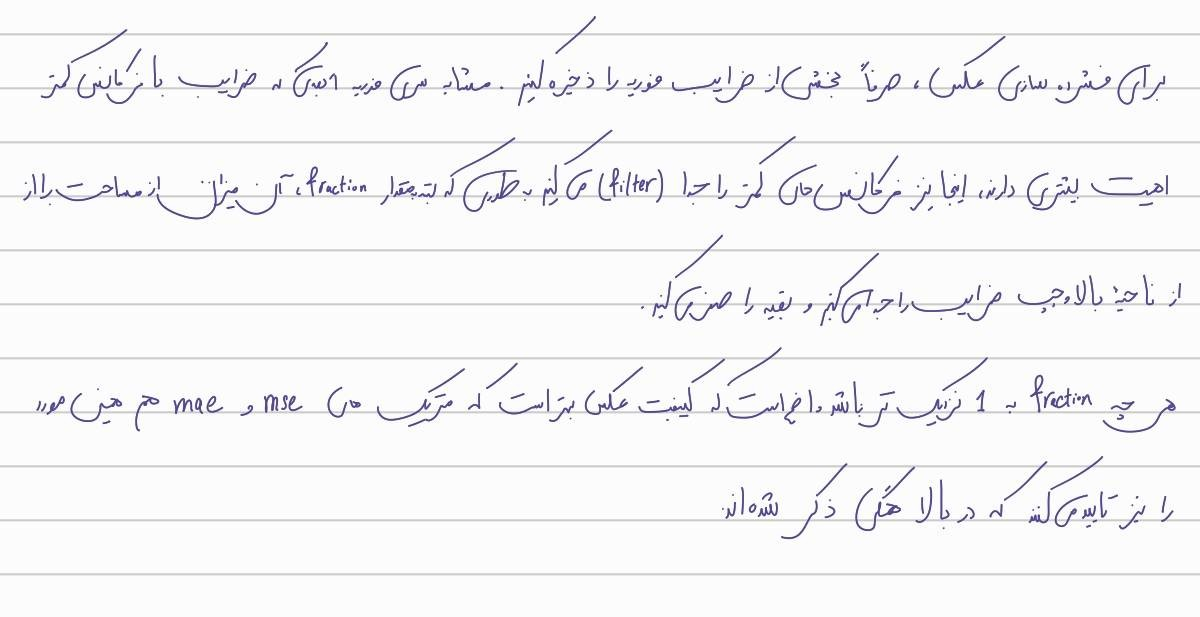

## Colored image

In [29]:
def load_image(path, width, height):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(width, height),
                       interpolation=cv2.INTER_CUBIC) / 255.0
    return image

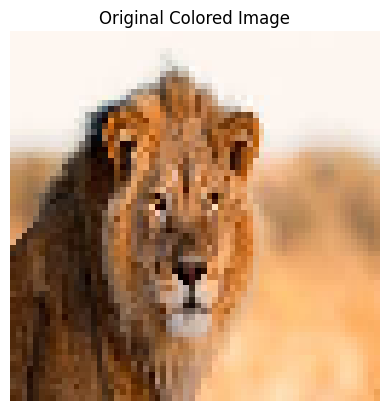

In [36]:
image = load_image("./lion2.jpeg", 64, 64)
F_rgb = np.zeros_like(image, dtype=complex)

plt.imshow(image)
plt.title('Original Colored Image')
plt.axis('off')

plt.show()

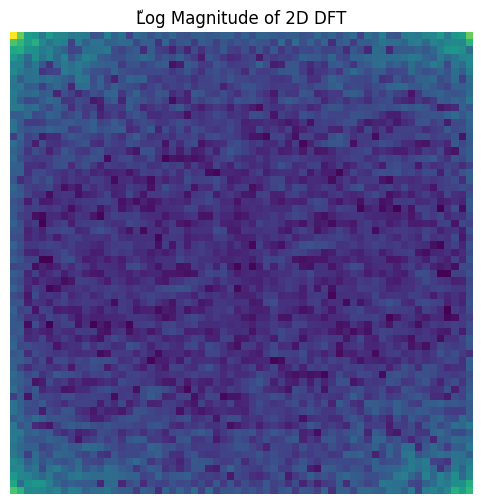

In [44]:
F0 = dft2d(image[:,:,0])
# A=idft2d(F)
plt.figure(figsize=(15, 6))
log_magnitude_dft = np.log(1 + np.abs(F0))

plt.imshow( log_magnitude_dft)
plt.title('ّLog Magnitude of 2D DFT')
plt.axis('off')
plt.show()


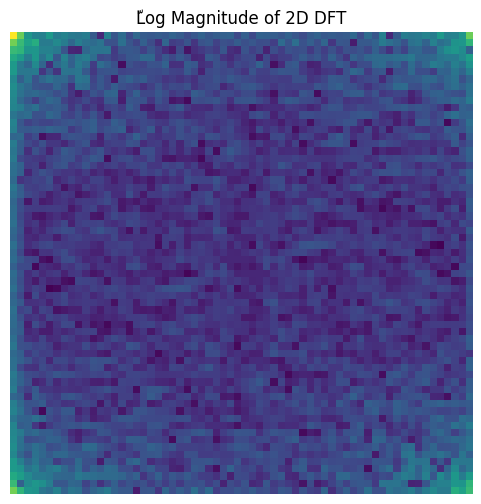

In [39]:
F1 = dft2d(image[:,:,1])
# A=idft2d(F)
plt.figure(figsize=(15, 6))
log_magnitude_dft = np.log(1 + np.abs(F1))

plt.imshow( log_magnitude_dft)
plt.title('ّLog Magnitude of 2D DFT')
plt.axis('off')
plt.show()


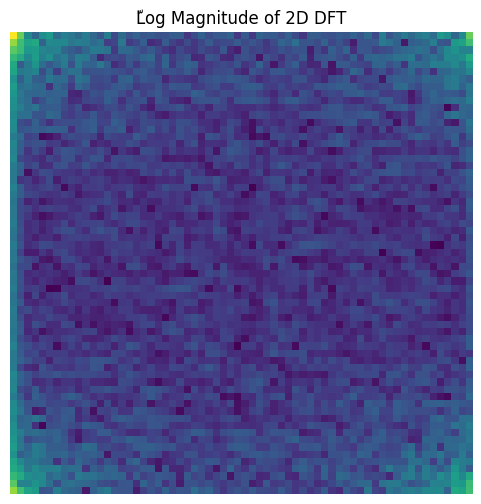

In [40]:
F2 = dft2d(image[:,:,2])
# A=idft2d(F)
plt.figure(figsize=(15, 6))
log_magnitude_dft = np.log(1 + np.abs(F2))

plt.imshow( log_magnitude_dft)
plt.title('ّLog Magnitude of 2D DFT')
plt.axis('off')
plt.show()


Loss (25% coefficients):
Loss (50% coefficients):
Loss (75% coefficients):
Loss (100% coefficients):


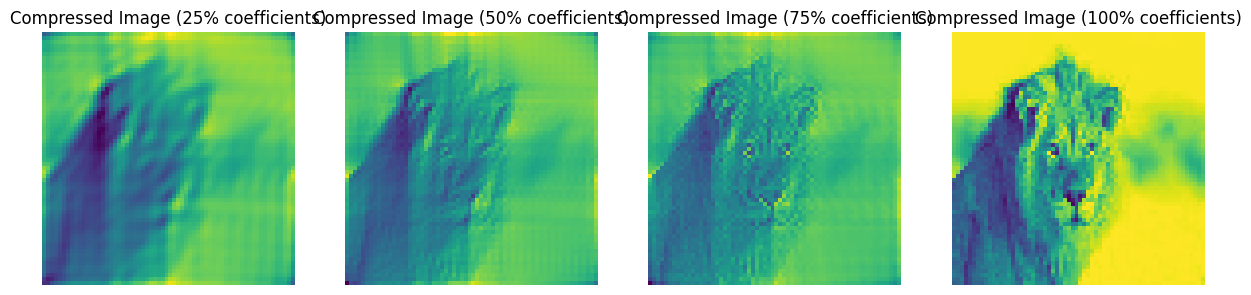

In [45]:
fractions = [0.25, 0.5, 0.75, 1]
plt.figure(figsize=(15, 6))

for i, frac in enumerate(fractions):
    compressed_F = compress_image(F0, frac)
    reconstructed_image = np.abs(idft2d(compressed_F))

    plt.subplot(1, len(fractions), i + 1)
    plt.imshow(reconstructed_image)
    plt.title(f'Compressed Image ({frac *100:.0f}% coefficients)')
    plt.axis('off')
    
    print(f"Loss ({frac *100:.0f}% coefficients):")
    
    
plt.show()

Loss (25% coefficients):
Loss (50% coefficients):
Loss (75% coefficients):
Loss (100% coefficients):


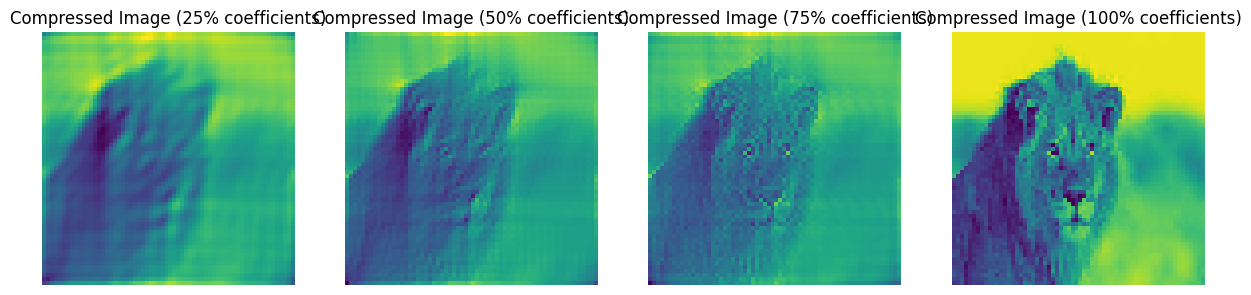

In [41]:
fractions = [0.25, 0.5, 0.75, 1]
plt.figure(figsize=(15, 6))

for i, frac in enumerate(fractions):
    compressed_F = compress_image(F1, frac)
    reconstructed_image = np.abs(idft2d(compressed_F))

    plt.subplot(1, len(fractions), i + 1)
    plt.imshow(reconstructed_image)
    plt.title(f'Compressed Image ({frac *100:.0f}% coefficients)')
    plt.axis('off')
    
    print(f"Loss ({frac *100:.0f}% coefficients):")
    
    
plt.show()

Loss (25% coefficients):
Loss (50% coefficients):
Loss (75% coefficients):
Loss (100% coefficients):


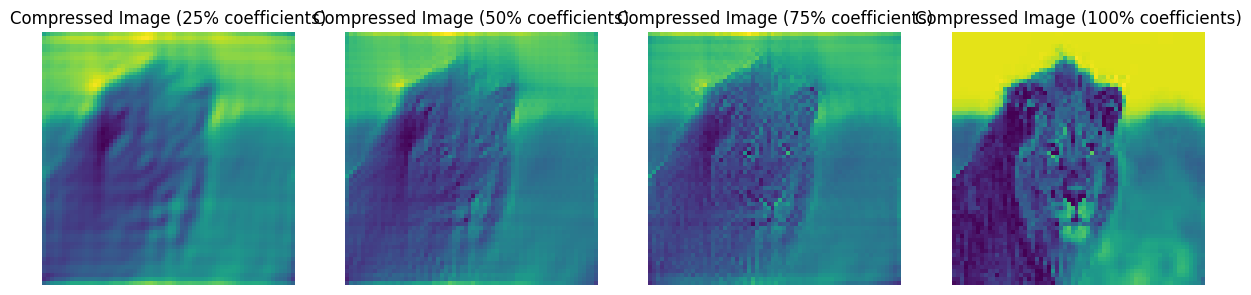

In [42]:
fractions = [0.25, 0.5, 0.75, 1]
plt.figure(figsize=(15, 6))

for i, frac in enumerate(fractions):
    compressed_F = compress_image(F2, frac)
    reconstructed_image = np.abs(idft2d(compressed_F))

    plt.subplot(1, len(fractions), i + 1)
    plt.imshow(reconstructed_image)
    plt.title(f'Compressed Image ({frac *100:.0f}% coefficients)')
    plt.axis('off')
    
    print(f"Loss ({frac *100:.0f}% coefficients):")
    
    
plt.show()

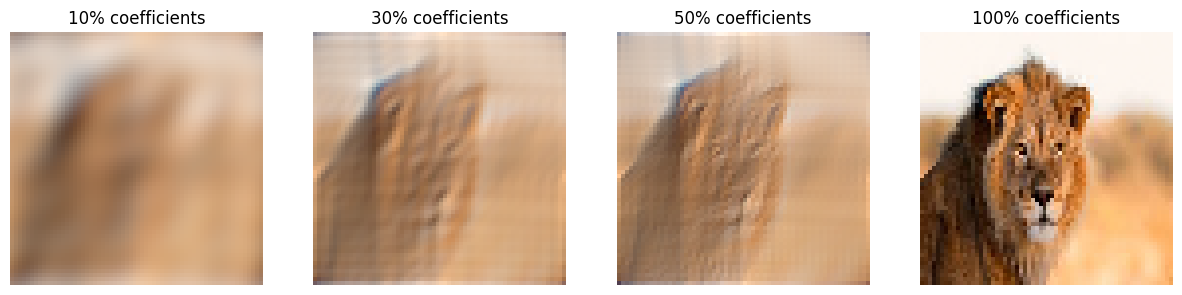

In [ ]:
fractions = [0.1, 0.3, 0.5, 1.0]

plt.figure(figsize=(15, 8))

for i, frac in enumerate(fractions):
    reconstructed_channels = []
    for ch in range(3):  
        channel = image[:, :, ch]
        F = dft2d(channel)
        F_compressed = compress_image(F, frac)
        channel_reconstructed = np.abs(idft2d(F_compressed))
        reconstructed_channels.append(channel_reconstructed)
    
    reconstructed_image = np.stack(reconstructed_channels, axis=2)
    reconstructed_image = np.clip(reconstructed_image, 0, 1)

    plt.subplot(1, len(fractions), i + 1)
    plt.imshow(reconstructed_image)
    plt.title(f'{frac*100:.0f}% coefficients')
    plt.axis('off')

plt.show()
